In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.image as mpimg

# Q2.1 PCA: 2-dimensional Toy Data 

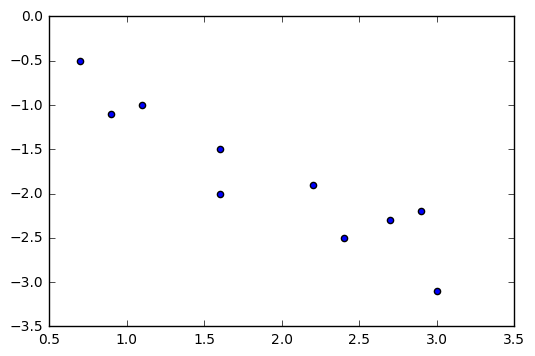

In [118]:
pcaData2D = pd.read_csv('pca-data-2d.dat', sep="\s+", names=['x','y'])
pcaData2D.describe()
plt.scatter(pcaData2D.x, pcaData2D.y)

In [119]:
pcaData2D.shape

(10, 2)

In [120]:
def centerize( df ):
    mean = np.mean( df, axis = 0 )
    centered = df - mean 
    return (centered, mean)

(centered_pcaData2D, _ ) = centerize(pcaData2D)

print(centered_pcaData2D)
print(np.mean(centered_pcaData2D, axis=0))

      x     y
0  0.49 -0.69
1 -1.21  1.31
2  0.99 -0.39
3  0.29 -0.09
4  1.09 -1.29
5  0.79 -0.49
6 -0.31 -0.19
7 -0.81  0.81
8 -0.31  0.31
9 -1.01  0.71
x    3.552714e-16
y    4.440892e-17
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fcc74a1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2fbfb69c88>]], dtype=object)

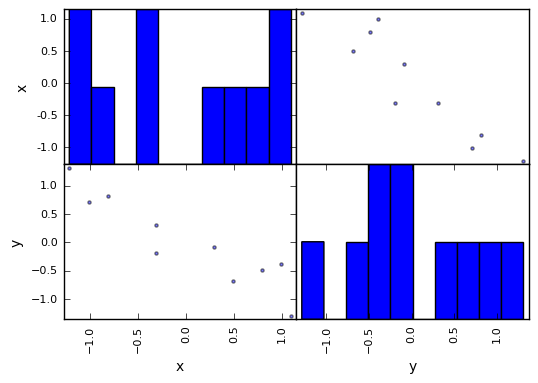

In [121]:
scatter_matrix( centered_pcaData2D )

In [122]:
class PCA:
    def __init__(self, X):
        # X's shape (items,dimensions)
        (centered, self.means) = centerize(X)
        cov = np.cov( centered.T )

        (eig_values, eig_vectors) = np.linalg.eig(cov)

        eig_idx = np.argsort(-eig_values)
        (self.eig_values, self.eig_vectors) = (eig_values[eig_idx], eig_vectors[:,eig_idx])
        
    def project(self, X):
        # X's shape (items,dimensions)
        X = X - self.means
        return np.dot(X, self.eig_vectors)
    
    def reconstruct(self, X, eig_vectors_idx):
        res = np.dot( X, self.eig_vectors[:, eig_vectors_idx].T )
        res = res.T + self.means.reshape(len(self.means),1)
        return res.T
    
my_pca = PCA(pcaData2D)
print(my_pca.eig_values)
print(my_pca.eig_vectors[:,0])

[ 1.28402771  0.0490834 ]
[ 0.73517866 -0.6778734 ]


In [123]:
my_pca.eig_vectors

array([[ 0.73517866,  0.6778734 ],
       [-0.6778734 ,  0.73517866]])

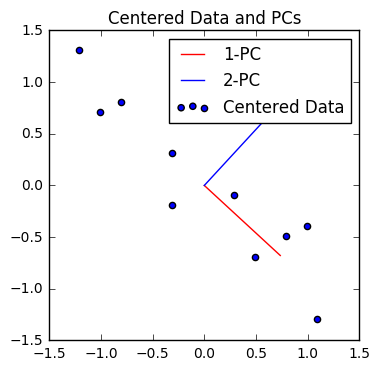

In [124]:

colors = ['r','b']

plt.figure(figsize=(4,4))

plt.scatter(centered_pcaData2D['x'], centered_pcaData2D['y'], label="Centered Data")
for i in range(len(my_pca.eig_values)):
    vector = my_pca.eig_vectors[:,i];
    plt.plot((0,vector[0]),(0,vector[1]), c= colors[i], label='%d-PC' % (i+1) )
    plt.legend()
plt.title('Centered Data and PCs')
plt.show()

### Reconstruction from PCs space
Let $\hat{x}^{(\alpha)}_{1:k} \in R^{1xk}$ be $x^{(\alpha)} \in R^{1xD}$ projected to space spanned by $1$-PC up to $k$-PC. Thus, $x^{(\alpha)}$ can be as followed

\begin{align*}
x^{(\alpha)} = \hat{x}^{(\alpha)}_{1:k} \cdot V_{1:k}
\end{align*}

where
- $D$ is no. of dimensions in original space.
- $V_{1:k} \in R^{D:k}$ is a matrix of PCs(eigen vectors of COV) to $k$-th according to the rank of eigen values in descending order.


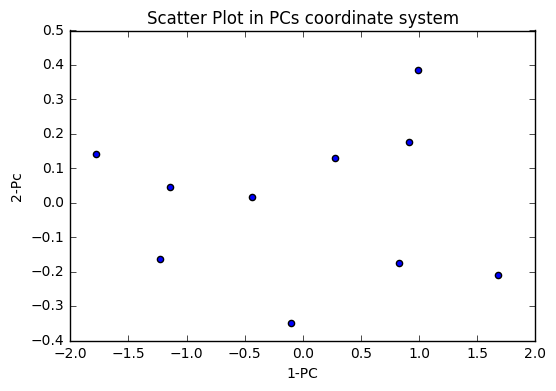

In [125]:
pcaData2D_projected_to_PCs = my_pca.project( pcaData2D )

plt.scatter( pcaData2D_projected_to_PCs[:, 0], pcaData2D_projected_to_PCs[:, 1])
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


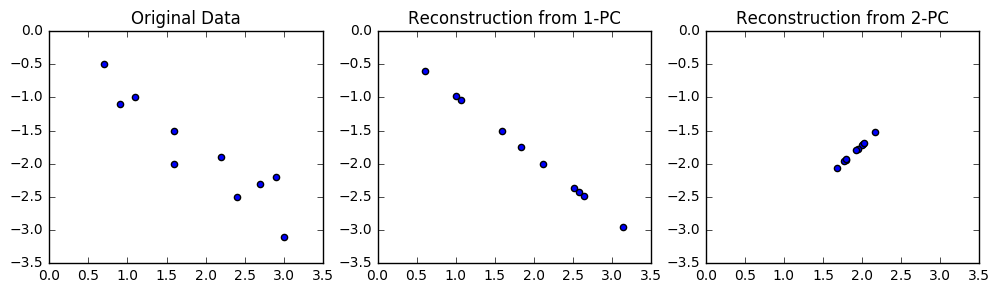

In [126]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.ylim(-3.5,0)
plt.xlim(0,3.5)
plt.scatter( pcaData2D['x'], pcaData2D['y'] )
plt.title('Original Data')

pc_idx = 0
reconstructed_pcaData2D = my_pca.reconstruct( pcaData2D_projected_to_PCs[:,pc_idx].reshape(10,1), [pc_idx])
plt.subplot(1,3,2)
plt.title('Reconstruction from %d-PC' % (pc_idx+1))
plt.ylim(-3.5,0)
plt.xlim(0,3.5)
plt.scatter( reconstructed_pcaData2D[:, 0], reconstructed_pcaData2D[:, 1])

pc_idx = 1
reconstructed_pcaData2D = my_pca.reconstruct( pcaData2D_projected_to_PCs[:,pc_idx].reshape(10,1), [pc_idx])
plt.subplot(1,3,3)
plt.title('Reconstruction from %d-PC' % (pc_idx+1))
plt.ylim(-3.5,0)
plt.xlim(0,3.5)
plt.scatter( reconstructed_pcaData2D[:, 0], reconstructed_pcaData2D[:, 1])

# Q2.2 PCA: 3-dimensional Toy Data 

In [127]:
pcaData3D = pd.read_csv('pca-data-3d.txt')
pcaData3D.describe()

x           y           z
count  500.000000  500.000000  500.000000
mean     0.043555    0.091908   -0.059460
std      0.965748    1.345888    2.094110
min     -2.728321   -3.487070   -3.061867
25%     -0.658242   -0.840618   -2.045611
50%      0.055413    0.140944   -0.150139
75%      0.711236    0.985253    2.028950
max      2.303785    3.836981    3.028818

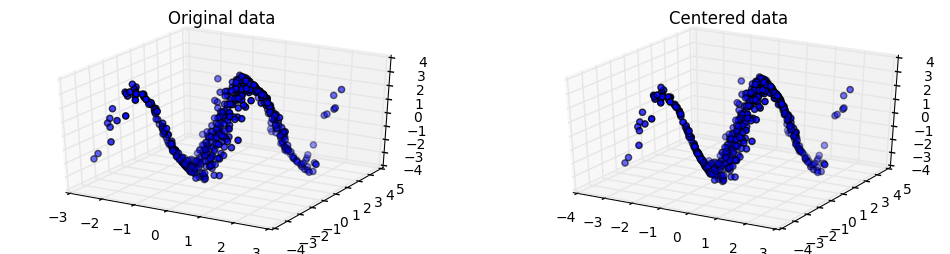

In [128]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter( pcaData3D.x, pcaData3D.y, pcaData3D.z )
plt.title('Original data')

(centered_pcaData3D, _ ) = centerize(pcaData3D)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter( centered_pcaData3D.x, centered_pcaData3D.y, centered_pcaData3D.z )
plt.title('Centered data')
# data already centered \o/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fccd71b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2fcc94ca58>]], dtype=object)

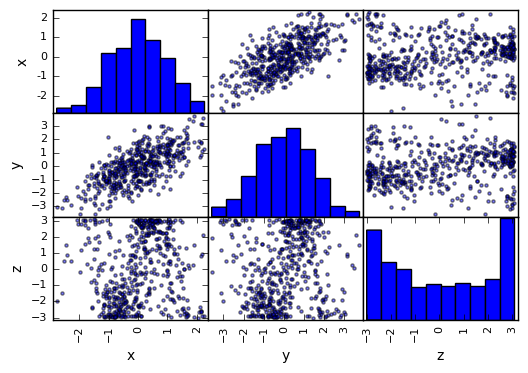

In [129]:
scatter_matrix(centered_pcaData3D)

In [130]:
my_pca3D = PCA(pcaData3D)
my_pca3D.eig_values

array([ 4.4947884 ,  2.24956199,  0.38503192])

In [131]:
my_pca3D.eig_vectors

array([[ 0.12121678,  0.51120047, -0.85087048],
       [ 0.1844957 ,  0.83065188,  0.52533684],
       [ 0.9753296 , -0.22066159,  0.00637466]])

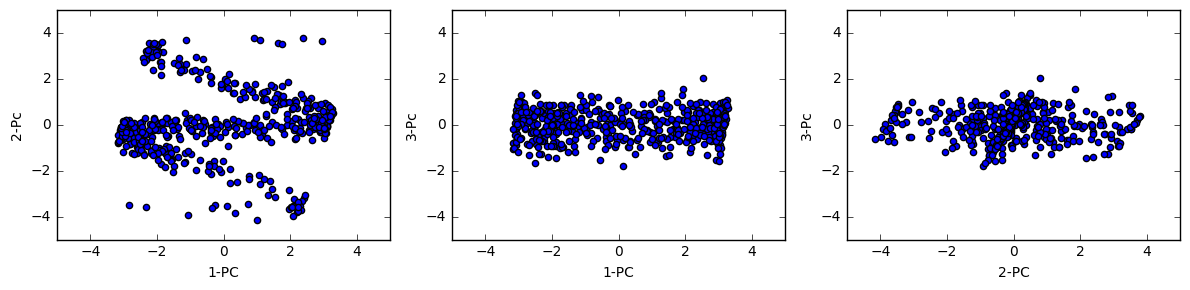

In [132]:
pcaData3D_projected_to_PCs = my_pca3D.project( pcaData3D )
plt.figure(figsize=(12,3))
scale = 5
for i in range(3):
    for j in range(i+1,3):
        plt.subplot(1,3,i+j)
        plt.scatter( pcaData3D_projected_to_PCs[:, i], pcaData3D_projected_to_PCs[:, j])
        plt.xlabel('%d-PC' % (i+1))
        plt.ylabel('%d-Pc' % (j+1))
        plt.ylim(-scale,scale)
        plt.xlim(-scale,scale)
plt.tight_layout()

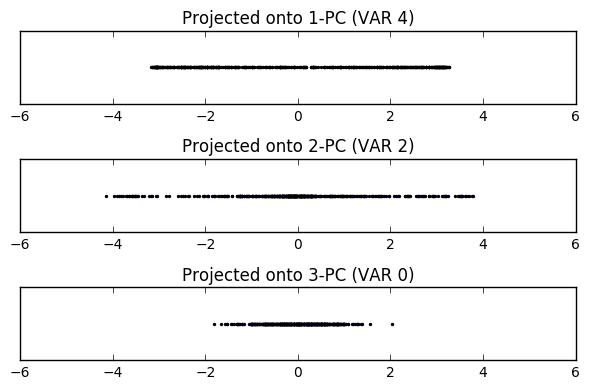

In [133]:
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.xlim(-6,6)
    data = pcaData3D_projected_to_PCs[:,i]
    variance = np.var(data)
    plt.title('Projected onto %d-PC (VAR %d)' %(i+1, variance))

    plt.yticks([])
    plt.scatter( data, [0]*pcaData3D_projected_to_PCs.shape[0], s=2)
plt.tight_layout()

### Computing Distortion [1]

![](http://i.imgur.com/InyabDV.png)

no. of data times sum of eigen values of coordianates that aren't used.

[1] https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=Lectures.PCA#toc4

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


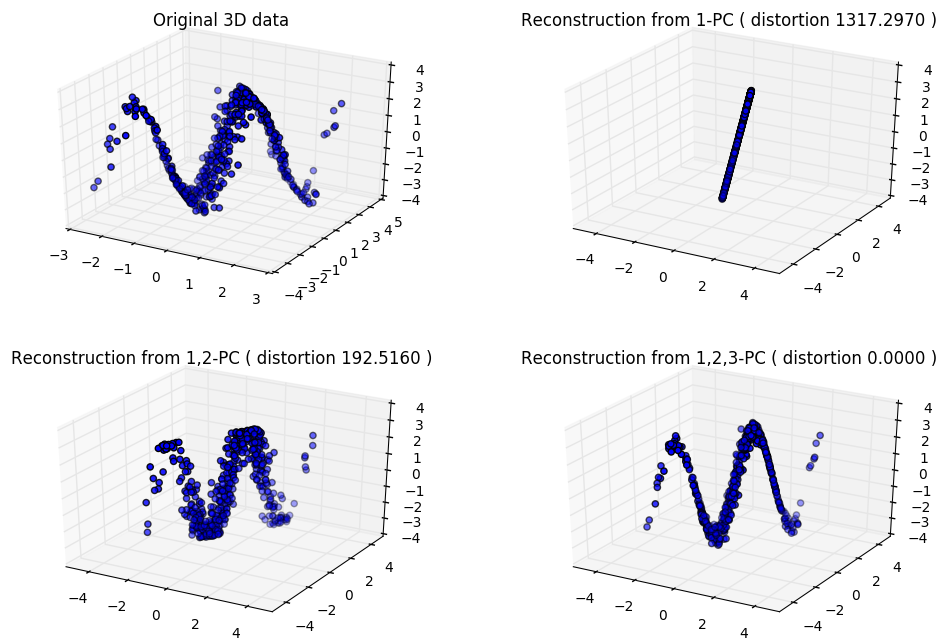

In [134]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,2,1, projection='3d')

ax.scatter( pcaData3D.x, pcaData3D.y, pcaData3D.z )
plt.title('Original 3D data')

for i in range(3):
    pc_idx = range(i+1)
    reconstructed_pcaData3D = my_pca3D.reconstruct( pcaData3D_projected_to_PCs[:,pc_idx].reshape(500,len(pc_idx)), pc_idx)
    ax = fig.add_subplot(2,2,i+2, projection='3d')

    plt.ylim(-5,5)
    plt.xlim(-5,5)
    
    diff = pcaData3D - reconstructed_pcaData3D
    norm = np.linalg.norm(diff, axis=1)
    sum_unused_eig = np.sum(my_pca3D.eig_values[i+1:])
    distortion = sum_unused_eig*500

    ax.scatter( reconstructed_pcaData3D[:, 0], reconstructed_pcaData3D[:, 1], reconstructed_pcaData3D[:,2] )
    plt.title('Reconstruction from %s-PC ( distortion %.4f )' % (','.join(map(lambda x: str(x+1),pc_idx)), distortion))

# Q2.2.c discussion
 Examine the 3d-reconstruction of the data in the original coordinate systems when using only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful these directions (i.e., the PCs) are.

# Q2.3 Projections of a dynamical system

In [135]:
expData = pd.read_csv('expDat.txt',index_col=0)
expData.describe()

V1          V2          V3          V4          V5          V6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     4.810000    4.840000    5.360000    5.420000    4.880000    5.160000   
std      3.991645    3.719237    4.265246    4.264441    4.013311    3.759755   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
50%      4.000000    4.000000    4.000000    4.000000    3.500000    4.000000   
75%      7.000000    7.000000    7.000000    7.250000    8.000000    8.000000   
max     17.000000   17.000000   19.000000   18.000000   17.000000   16.000000   

              V7          V8         V9         V10         V11         V12  \
count  100.00000  100.000000  100.00000  100.000000  100.000000  100.000000   
mean     4.99000    5.040000    4.65000    4.810000    5.030000    5.140000   
std      3.87297    3.795053    3.82542    3.329376    4.312198    4.189983   
min      0.00000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%      2.00000    2.000000    2.00000    2.000000    2.000000    2.000000   
50%      3.50000    4.000000    4.00000    4.000000    4.000000    4.000000   
75%      8.00000    8.000000    7.00000    7.000000    7.000000    7.000000   
max     18.00000   15.000000   18.00000   15.000000   20.000000   19.000000   

              V13         V14         V15         V16       V17         V18  \
count  100.000000  100.000000  100.000000  100.000000  100.0000  100.000000   
mean     5.020000    4.870000    5.120000    4.680000    4.9700    4.880000   
std      3.926033    3.791684    4.025876    3.703343    3.9631    4.053381   
min      0.000000    0.000000    0.000000    0.000000    0.0000    0.000000   
25%      2.000000    2.000000    2.000000    2.000000    2.0000    2.000000   
50%      4.000000    4.000000    4.000000    4.000000    4.0000    3.500000   
75%      7.000000    7.000000    7.000000    6.250000    7.0000    7.000000   
max     16.000000   15.000000   18.000000   16.000000   16.0000   17.000000   

              V19         V20  
count  100.000000  100.000000  
mean     5.170000    5.080000  
std      4.476775    3.945794  
min      0.000000    0.000000  
25%      2.000000    3.000000  
50%      3.000000    4.000000  
75%      8.000000    6.000000  
max     23.000000   20.000000

In [136]:
print(expData.shape)

(100, 20)


In [137]:
my_pca_dynamic = PCA(expData)

print('First 2 eigen values')
print(my_pca_dynamic.eig_values[0:2])
print('and their corresponding PC')
print(my_pca_dynamic.eig_vectors[:,0:2])

First 2 eigen values
[ 159.49341723   67.25799252]
and their corresponding PC
[[ 0.23170068 -0.21830578]
 [ 0.20360727 -0.19920182]
 [ 0.25007147 -0.22656499]
 [ 0.23686223  0.25687137]
 [ 0.24044926  0.15817077]
 [ 0.20440472  0.22088493]
 [ 0.24056995 -0.19487112]
 [ 0.24586141 -0.16185434]
 [ 0.17737701  0.22633286]
 [ 0.19751861 -0.12746   ]
 [ 0.23351045 -0.2675393 ]
 [ 0.25924694 -0.17544956]
 [ 0.20479872  0.25260932]
 [ 0.20921262  0.25479589]
 [ 0.21936356  0.24699672]
 [ 0.1823281   0.24628233]
 [ 0.22130098  0.21538704]
 [ 0.21830107  0.24338423]
 [ 0.25554948 -0.2849078 ]
 [ 0.21697206 -0.22436526]]


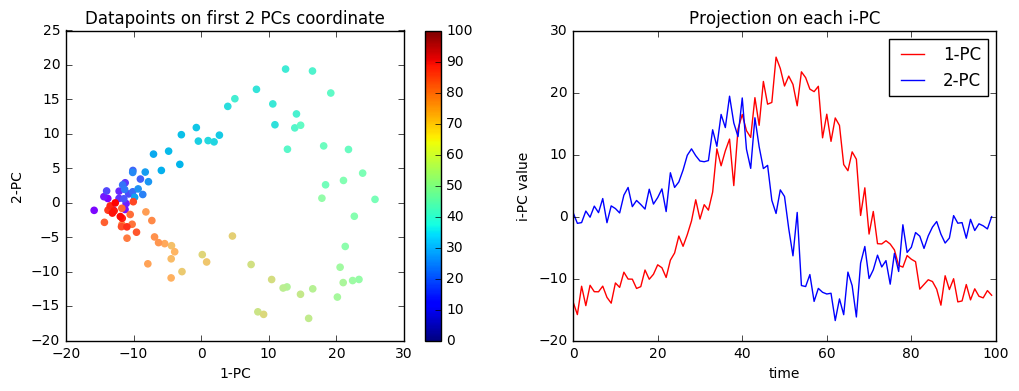

In [138]:
import matplotlib.cm as cm
projected_dynamic_sys = my_pca_dynamic.project(expData)

plt.figure(figsize=(12,4))

colors = cm.rainbow(np.linspace(0,1,100))
plt.subplot(1,2,1)
plt.scatter(projected_dynamic_sys[:,0], projected_dynamic_sys[:,1], color = colors)
plt.xlabel('1-PC')
plt.ylabel('2-PC')

m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(range(101))
plt.colorbar(m)
plt.title('Datapoints on first 2 PCs coordinate')

plt.subplot(1,2,2)
plt.xlabel('time')
plt.ylabel('i-PC value')
plt.plot( range(projected_dynamic_sys.shape[0]) , projected_dynamic_sys[:,0], c='r', label='1-PC')
plt.plot( range(projected_dynamic_sys.shape[0]) , projected_dynamic_sys[:,1], c='b', label='2-PC')
plt.title('Projection on each i-PC')
plt.legend()

### Change position of columns

In [139]:
cols = list(expData.columns)
np.random.shuffle(cols)
print(cols)

['V4', 'V7', 'V3', 'V9', 'V12', 'V13', 'V19', 'V10', 'V8', 'V1', 'V18', 'V11', 'V2', 'V17', 'V16', 'V15', 'V20', 'V6', 'V14', 'V5']


In [140]:
shuffled_exp_data = expData[cols]

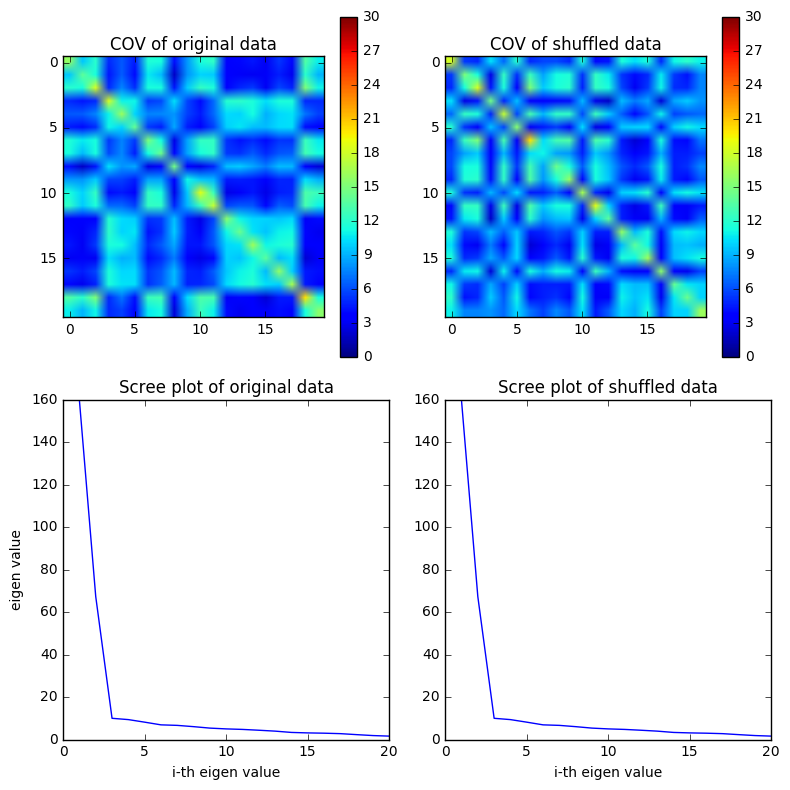

In [141]:
cov_original_data = np.cov(expData.T)
cov_shuffled_data = np.cov(shuffled_exp_data.T)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('COV of original data')
plt.imshow(cov_original_data, vmin=0, vmax=30)
plt.colorbar()

plt.subplot(2,2,2)
plt.title('COV of shuffled data')
plt.imshow(cov_shuffled_data, vmin=0, vmax=30)
plt.colorbar()

idx = range(1,21)

plt.subplot(2,2,3)
plt.title('Scree plot of original data')
plt.plot( idx, my_pca_dynamic.eig_values )
plt.ylabel('eigen value')
plt.xlabel('i-th eigen value')

plt.subplot(2,2,4)
plt.title('Scree plot of shuffled data')
plt.plot( idx, PCA(shuffled_exp_data).eig_values )
plt.xlabel('i-th eigen value')

plt.tight_layout()

### Shuffle content of each columns


In [142]:
expData.shape
scrambleData = np.zeros(expData.shape)

expDataMatrix = np.copy(expData.values)
for i in range(expData.shape[1]):
    data = expDataMatrix[:, i]
    np.random.shuffle(data)
    scrambleData[:, i] = data

    
print(scrambleData)

[[ 11.   3.   3. ...,   1.   1.  12.]
 [  0.   6.   4. ...,   3.   1.   3.]
 [  5.  11.   5. ...,  10.  10.   5.]
 ..., 
 [ 13.   3.  14. ...,   3.   2.   4.]
 [  2.   2.  13. ...,  17.   0.   9.]
 [  9.   2.   2. ...,   5.   3.  10.]]


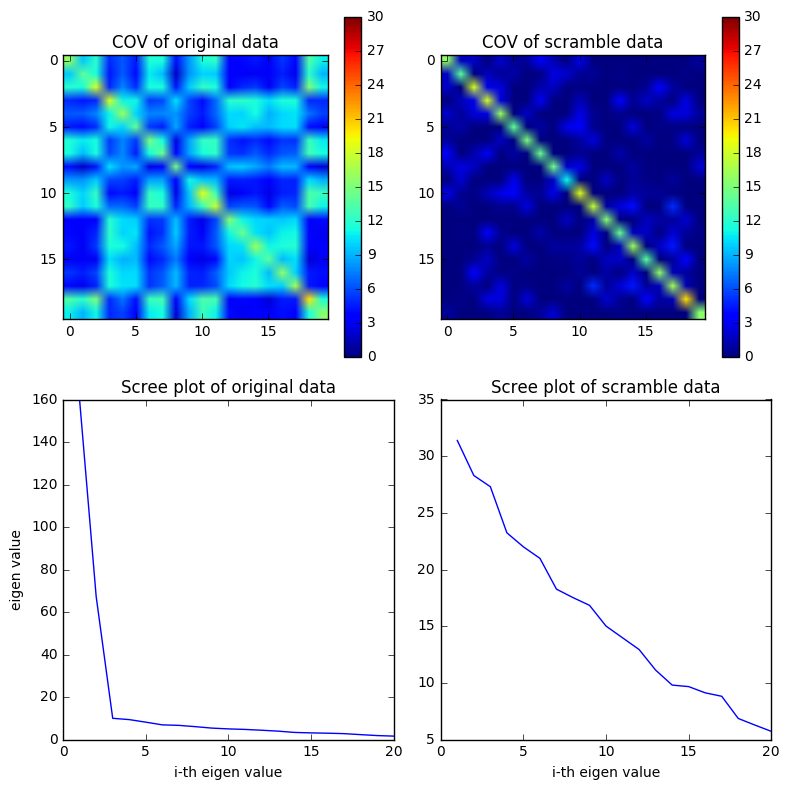

In [143]:
cov_original_data = np.cov(expData.T)
cov_shuffled_data = np.cov(scrambleData.T)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('COV of original data')
plt.imshow(cov_original_data, vmin=0, vmax=30)
plt.colorbar()

plt.subplot(2,2,2)
plt.title('COV of scramble data')
plt.imshow(cov_shuffled_data, vmin=0, vmax=30)
plt.colorbar()


idx = range(1,21)

plt.subplot(2,2,3)
plt.title('Scree plot of original data')
plt.plot( idx, my_pca_dynamic.eig_values )
plt.ylabel('eigen value')
plt.xlabel('i-th eigen value')

plt.subplot(2,2,4)
plt.title('Scree plot of scramble data')
plt.plot( idx, PCA(scrambleData).eig_values )
plt.xlabel('i-th eigen value')


plt.tight_layout()

### 2.3.e What would happend if we shuffle items instead of columns?
COV won't be affected

# 2.4 Image data compression and reconstruction

In [144]:
import matplotlib.image as mpimg
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
    

In [145]:
b1 = mpimg.imread('./imgpca/b%d.jpg'%(1))

def loadImageMatrix(cat, n=10, patch_size=(16,16), patches_per_img=500):
    total_cols = patch_size[0]*patch_size[1]
    matrix = np.zeros((n*patches_per_img, total_cols))
    for i in range(n):
        img = mpimg.imread('./imgpca/%s%d.jpg'%(cat, i+1))
        str_idx = i*patches_per_img
        patches = extract_patches_2d(img, patch_size=patch_size, max_patches = patches_per_img )
        matrix[ str_idx:str_idx+patches_per_img, : ] = patches.reshape(patches_per_img, total_cols )

    return matrix

matrix_building = loadImageMatrix('b')

In [146]:
pca_building = PCA(matrix_building)
print(pca_building.eig_values[0:24])

[ 584056.40922009   97764.27402683   33293.51363941   27218.17212258
   13634.8349244    10637.93770918   10144.42903825    7713.32292694
    6912.80255415    5779.56804178    4736.00892072    4388.11639579
    4057.90111828    3730.84040148    3503.07509774    3397.16113453
    2875.44586831    2753.76718494    2609.18019219    2567.36089296
    2508.54586916    2264.14728728    2243.42904541    2118.58520225]


First 24 eigen vectors of `building` category


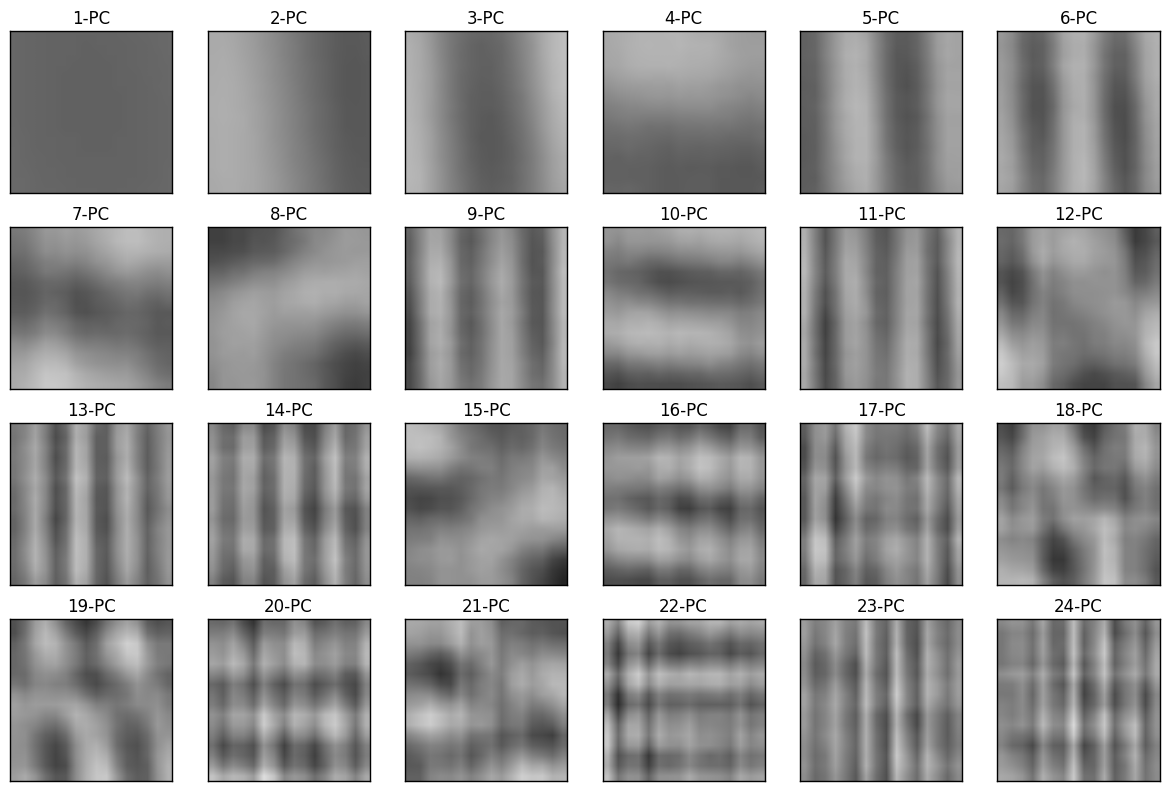

In [147]:
def plotPCs(pca_obj, cmap="gray", vmin=None, vmax=None):
    plt.figure(figsize=(12,8))
    for i in range(4):
        for j in range(6):
            idx = i*6+j
            plt.subplot(4,6,idx+1)
            plt.imshow(pca_obj.eig_vectors[:, idx].reshape(16,16), cmap=cmap, vmin=vmin, vmax=vmax)
            plt.title( "%d-PC" %(idx+1))
            plt.xticks([])
            plt.yticks([])
    plt.tight_layout()
print('First 24 eigen vectors of `building` category')
plotPCs(pca_building, vmin=np.min(pca_building.eig_vectors), vmax=np.max(pca_building.eig_vectors))

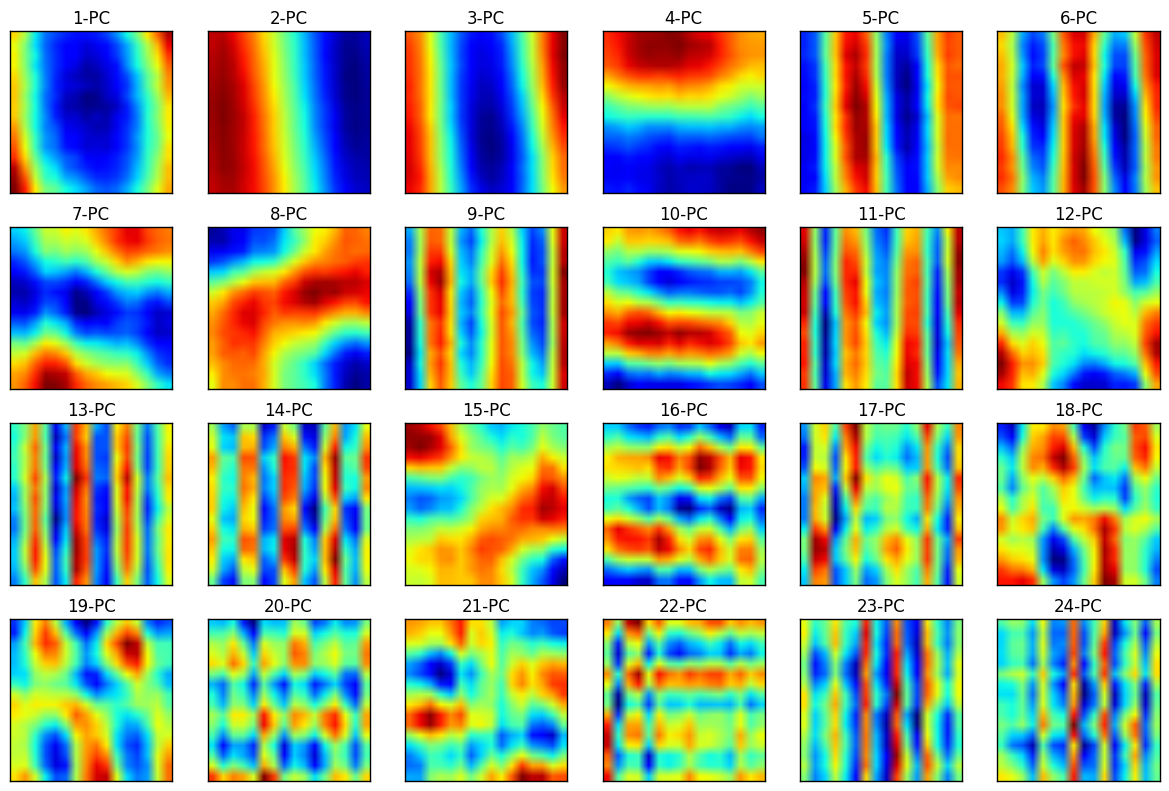

In [148]:
plotPCs(pca_building,cmap="jet")
# plotPCs(pca_building)

In [149]:
matrix_nature = loadImageMatrix('n')
pca_nature = PCA(matrix_nature)

First 24 eigen vectors of `nature` category


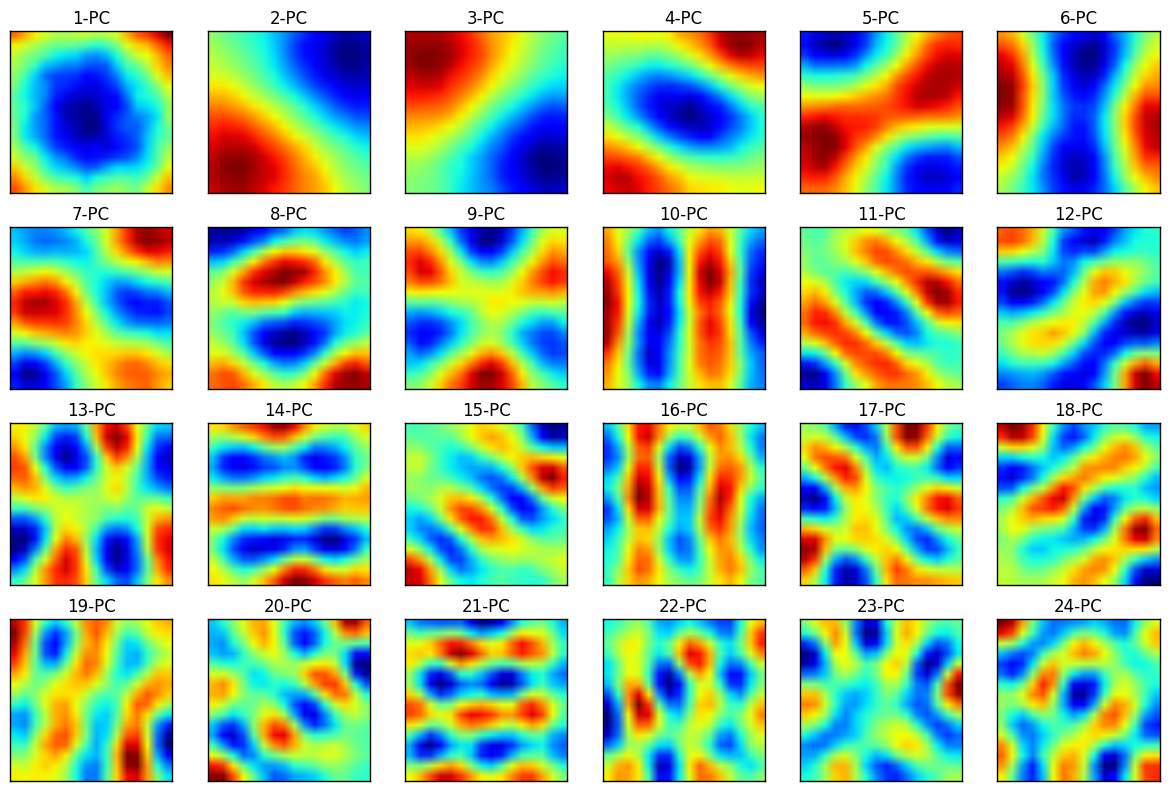

In [150]:
print('First 24 eigen vectors of `nature` category')
plotPCs(pca_nature, cmap="jet")

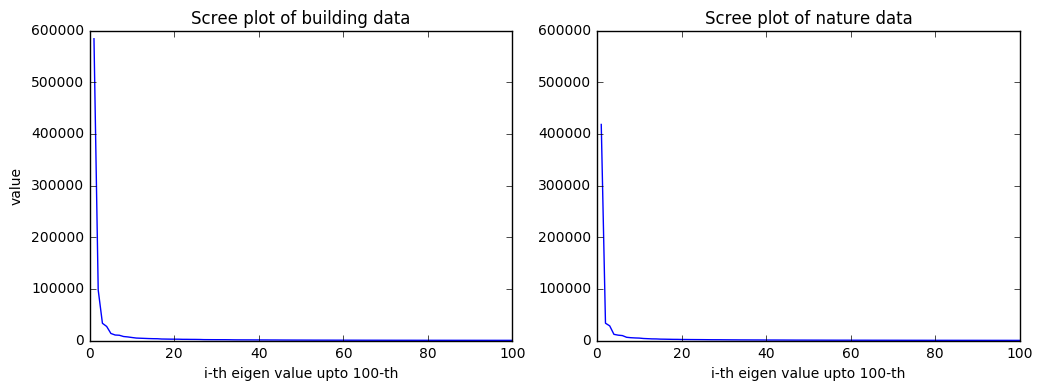

In [151]:
limit = 100
idx = range(1, limit+1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Scree plot of building data')
plt.plot( idx, pca_building.eig_values[:limit] )
plt.ylim(0,600000)
plt.ylabel('value')
plt.xlabel('i-th eigen value upto %d-th' % limit)

plt.subplot(1,2,2)
plt.title('Scree plot of nature data')
plt.plot( idx, pca_nature.eig_values[:limit] )
plt.ylim(0,600000)
plt.xlabel('i-th eigen value upto %d-th' % limit)

In [152]:
def findNoPCs(pca_object, variance_preserved_threshold = 0.95 ):
    cum_sum_vars = np.cumsum(pca_object.eig_values)
    preserved_ratios = cum_sum_vars / cum_sum_vars[-1]


    no_pcs = np.searchsorted(preserved_ratios, variance_preserved_threshold )
    print("To preserve %d%% of variance" % (variance_preserved_threshold*100) )
    print("%3d PCs required and yielding compression ratio at %.4f" % (no_pcs, 256*256/(no_pcs*256)))
    
    return no_pcs
    
print("Buiding category")
for i in [0.90,0.95,0.99]:
    findNoPCs(pca_building, variance_preserved_threshold=i )

Buiding category
To preserve 90% of variance
 18 PCs required and yielding compression ratio at 14.2222
To preserve 95% of variance
 49 PCs required and yielding compression ratio at 5.2245
To preserve 99% of variance
161 PCs required and yielding compression ratio at 1.5901


In [153]:
print("Nature category")
for i in [0.90,0.95,0.99]:
    findNoPCs(pca_nature, variance_preserved_threshold=i )

Nature category
To preserve 90% of variance
 23 PCs required and yielding compression ratio at 11.1304
To preserve 95% of variance
 53 PCs required and yielding compression ratio at 4.8302
To preserve 99% of variance
137 PCs required and yielding compression ratio at 1.8686


(154715, 16, 16)


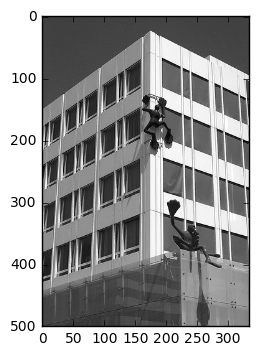

In [154]:
import math

filename = "./imgpca/b7.jpg"
img = mpimg.imread(filename)
plt.imshow(img, cmap="gray",vmin=0, vmax=255)
img_patches = extract_patches_2d(img, patch_size=(16,16))
print(img_patches.shape)

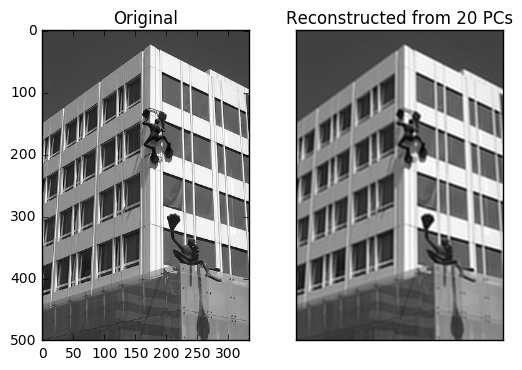

In [155]:
def plotProjectAndReconstruct(pca_object, img_patches, img_size, no_PCs=256):
    total_patches = img_patches.shape[0]
    projected = pca_object.project(img_patches.reshape(total_patches,256))

    idx = range(no_PCs)
    reconstructed = pca_object.reconstruct(projected[:, idx], idx )
    reconstructed = reconstructed.reshape( total_patches,16,16)
    img = reconstruct_from_patches_2d(reconstructed, img_size )
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray",vmin=0, vmax=255)

    
no_pc = 20
plt.subplot(1,2,2)
plotProjectAndReconstruct(pca_nature, img_patches, img.shape, no_PCs=no_pc )
plt.title("Reconstructed from %d PCs" % no_pc)

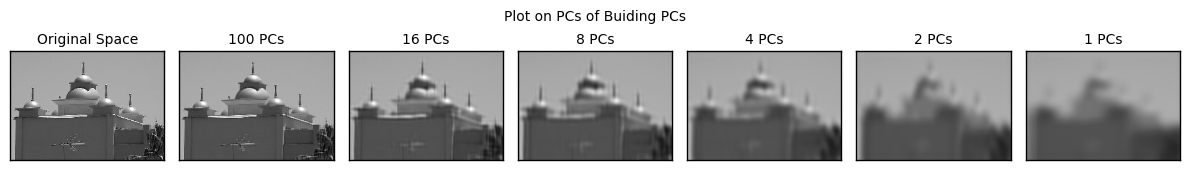

In [156]:
def plotImageByPCsOfCategory(imgname, pca_object, label=""):
    total_dims = len(pca_object.eig_values);
    
    fig = plt.figure(figsize=(12,2))
    fig.suptitle(label)
    
    img = mpimg.imread(imgname)
    patches = extract_patches_2d(img, patch_size=(16,16))

    plt.subplot(1,7,1)
    plotProjectAndReconstruct(pca_object, patches, img.shape, no_PCs=total_dims )
    plt.title("Original Space", fontsize=10)
    
    no_pcs = [100,16,8,4,2,1]

    for i in range(len(no_pcs)):
        plt.subplot(1,7,i+2)
        plotProjectAndReconstruct(pca_object, patches, img.shape, no_PCs=no_pcs[i] )
        plt.title("%d PCs" % no_pcs[i], fontsize=10)
    fig.tight_layout()
plotImageByPCsOfCategory("./imgpca/b9_2.jpg", pca_building, label="Plot on PCs of Buiding PCs")

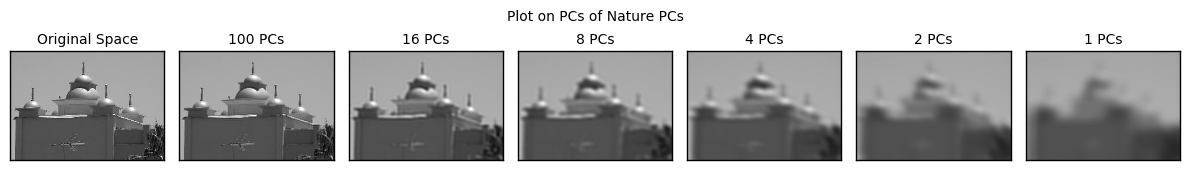

In [157]:
plotImageByPCsOfCategory("./imgpca/b9_2.jpg", pca_nature, label="Plot on PCs of Nature PCs")

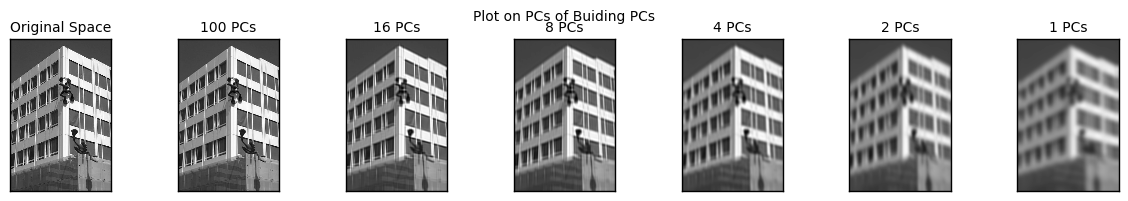

In [158]:
plotImageByPCsOfCategory("./imgpca/b7.jpg", pca_building, label="Plot on PCs of Buiding PCs")

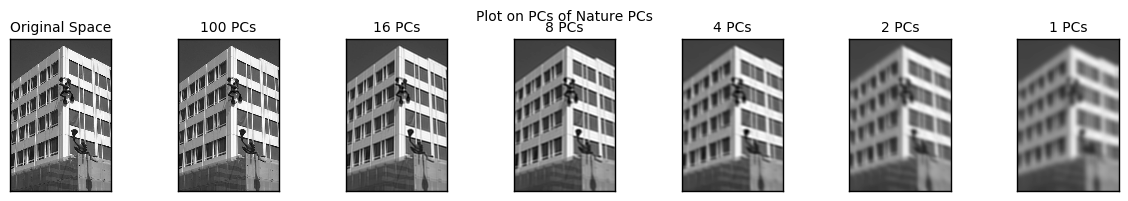

In [159]:
plotImageByPCsOfCategory("./imgpca/b7.jpg", pca_nature, label="Plot on PCs of Nature PCs")

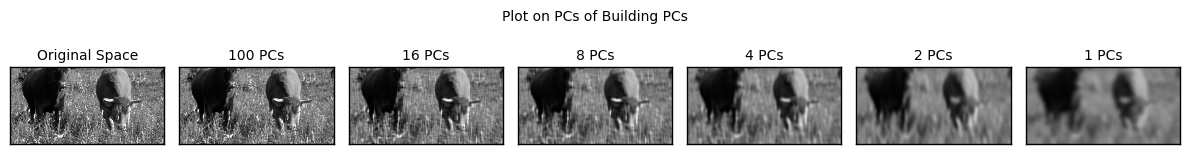

In [160]:
plotImageByPCsOfCategory("./imgpca/n5.jpg", pca_building, label="Plot on PCs of Building PCs")

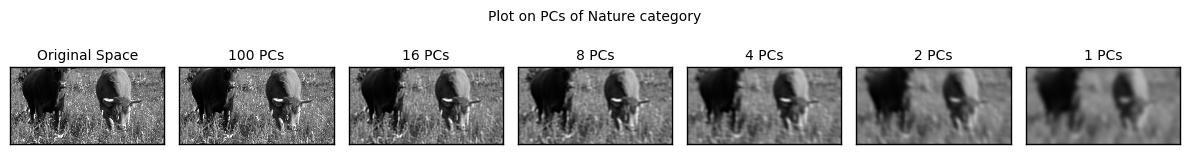

In [161]:
plotImageByPCsOfCategory("./imgpca/n5.jpg", pca_nature, label="Plot on PCs of Nature category")

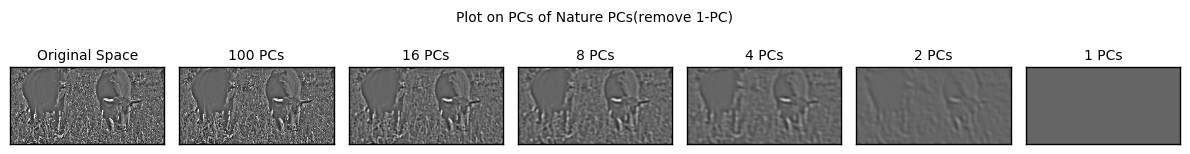

In [162]:
pca_nature_2 = PCA(matrix_nature)
pca_nature_2.eig_vectors[:,0] = np.zeros(256)
plotImageByPCsOfCategory("./imgpca/n5.jpg", pca_nature_2, label="Plot on PCs of Nature PCs(remove 1-PC)")

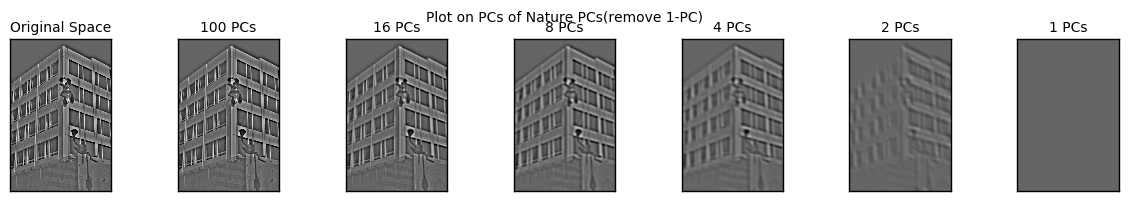

In [163]:
plotImageByPCsOfCategory("./imgpca/b7.jpg", pca_nature_2, label="Plot on PCs of Nature PCs(remove 1-PC)")